# Fake News Project
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

- What is a Fake News?

Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.
For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.

In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.

- Natural Language Processing

Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing.
In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.

- Dataset

There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. We have to insert one label column zero for fake news and one for true news. We have to combine both datasets using pandas built-in function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import lightgbm 
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import scikitplot as skplt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
from sklearn.neighbors import KNeighborsClassifier

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import scikitplot as skplt

import joblib
import pickle

# Importing the Dataset

In [2]:
true_news=pd.read_csv(r"C:\Users\hp pc\Downloads\Fake News Project\True.csv")
fake_news=pd.read_csv(r"C:\Users\hp pc\Downloads\Fake News Project\Fake.csv")

### Checking Top 5 rows Data

In [3]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# EDA
### Checking Total Numbers of Rows and Column

In [5]:
fake_news.shape

(23481, 4)

In [6]:
true_news.shape

(21417, 4)

### Checking All Column Name

In [7]:
fake_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [8]:
true_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

### Checking Data Type of All Data

In [9]:
fake_news.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [10]:
true_news.dtypes

title      object
text       object
subject    object
date       object
dtype: object

### Checking for Null Values

In [11]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

So, we can see only there is no Null values in columns.

### Describing Dataset

In [13]:
fake_news.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [14]:
true_news.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


### Creating one column label in both dataset 

In [15]:
fake_news['label']= 0

In [16]:
#checking dataset again after adding one more column
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
true_news['label']= 1

In [18]:
#checking dataset again after adding one more column
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Combining both dataset for pre-processing

In [19]:
news= pd.concat([fake_news, true_news], ignore_index=True)

In [20]:
#checking the dataset after combining
news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [21]:
#checking again total no of rows and columns
news.shape

(44898, 5)

In [22]:
#checking again column's name
news.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [23]:
#checking again column's datatype
news.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

### Dropping irrelevant columns

In [24]:
news.drop(['title', 'date', 'subject'], axis=1, inplace=True)

In [25]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


# Data Visualization
### Using Countplot

<AxesSubplot:xlabel='label', ylabel='count'>

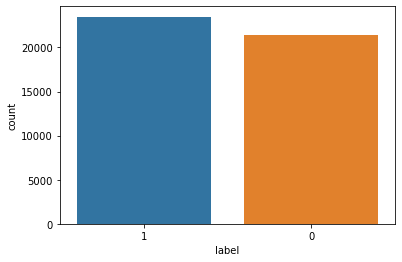

In [26]:
sns.countplot(data=news, x='label', order=news['label'].value_counts().index)

## Pre-Processing

### Creating a function to process the texts

In [27]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [28]:
news['text']=news['text'].apply(wordopt)

In [29]:
news.head()

,text,label
0,washington reuters the head of a conservat...,0
1,washington reuters transgender people will...,0
2,washington reuters the special counsel inv...,0
3,washington reuters trump campaign adviser ...,0
4,seattle washington reuters president donal...,0


### Wordcloud

In [30]:
wc = WordCloud(width = 500, height = 300, min_font_size= 10, background_color= 'black')

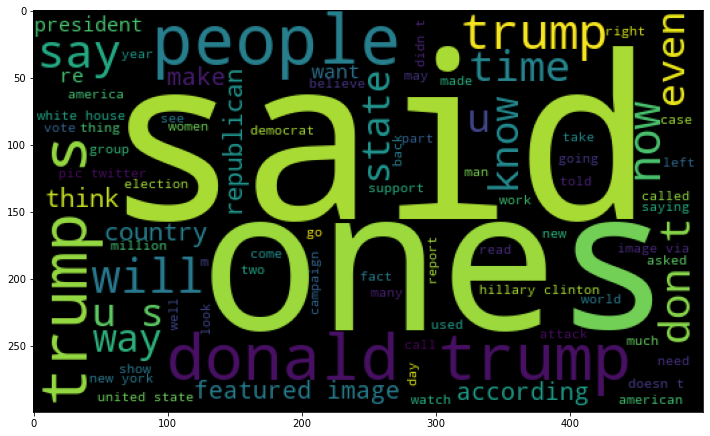

In [31]:
#Generating Word Cloud for True News
true_wordcloud = wc.generate(news[news['label']==1]['text'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(true_wordcloud)
plt.show()

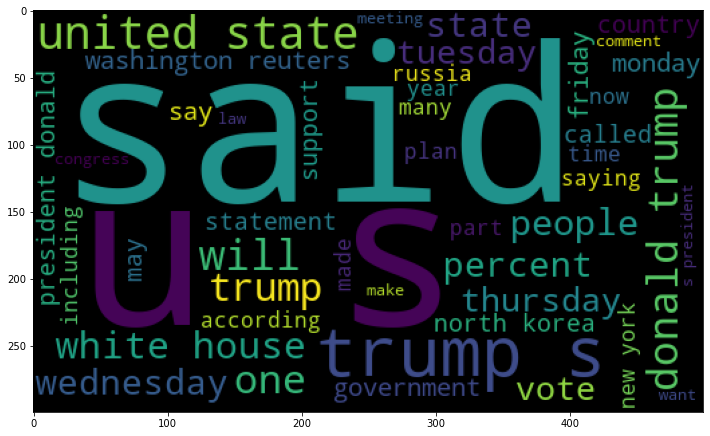

In [32]:
#Generating Word Cloud for Fake News
fake_wordcloud = wc.generate(news[news['label']==0]['text'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(fake_wordcloud)
plt.show()

### Top 30 most frequently occuring words

In [33]:
true_corpus = []
for msg in news[news['label']==1]['text'].tolist():
    for word in msg.split():
        true_corpus.append(word)

<function matplotlib.pyplot.show(close=None, block=None)>

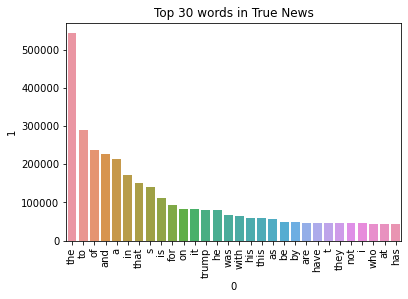

In [34]:
sns.barplot(pd.DataFrame(Counter(true_corpus).most_common(30))[0] , pd.DataFrame(Counter(true_corpus).most_common(30))[1])
plt.title("Top 30 words in True News")
plt.xticks(rotation = "vertical")
plt.show

In [35]:
fake_corpus = []
for msg in news[news['label']==0]['text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

<function matplotlib.pyplot.show(close=None, block=None)>

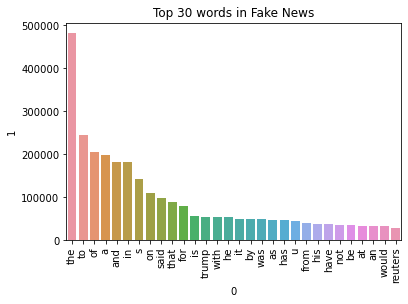

In [36]:
sns.barplot(pd.DataFrame(Counter(fake_corpus).most_common(30))[0] , pd.DataFrame(Counter(fake_corpus).most_common(30))[1])
plt.title("Top 30 words in Fake News")
plt.xticks(rotation = "vertical")
plt.show

### Defining dependent and independent variables

In [37]:
x = news["text"]
y = news["label"]

### Convert text to vectors using TfidfVectorizer

In [38]:
vectorizer = TfidfVectorizer(max_features=3000)
message_mat = vectorizer.fit_transform(news['text'])
message_mat

<44898x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 7128681 stored elements in Compressed Sparse Row format>

In [39]:
x= message_mat
print(x.shape)
print(y.shape)

(44898, 3000)
(44898,)


## Creating Model

### Finding the best random state

In [41]:
maxAccu = 0
maxRs = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred_LR = LR.predict(x_test)
    acc = accuracy_score(y_test,pred_LR)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')


Best Accuracy is 0.9892204899777283 on Random_state 34


### Splitting into train and test

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=maxRs)

In [43]:
# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (33673, 3000)
x_test (11225, 3000)
y_train (33673,)
y_test (11225,)


In [50]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [57]:
# Defining the Classification Machine Learning Algorithms
lr = LogisticRegression(solver='lbfgs')
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    # Prediction
    pred = model.predict(x_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    
    # Mean Absolute Error(MAE)
    print('Mean Absolute Error(MAE)',mean_absolute_error(y_test,pred))

    # Mean Squared Error(MSE)
    print('Mean Squared Error',mean_squared_error(y_test,pred))

    # Root Mean Squared Error (RMSE)
    print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
    
    # Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    
    # Confusion matrix and 
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    
    print("-"*120)
    print("\n")

### Training and testing of all the classification algorithms

In [58]:
for model in [lr,dtc,gbc,rfc,svc,bnb,mnb,sgd,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 98.92204899777283
Mean Absolute Error(MAE) 0.010779510022271715
Mean Squared Error 0.010779510022271715
Root Mean Squared Error 0.10382441920026192
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5412
           1       0.99      0.99      0.99      5813

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

CONFUSION MATRIX: 
 [[5358   54]
 [  67 5746]]

------------------------------------------------------------------------------------------------------------------------


******************************DecisionTreeClassifier******************************
ACCURACY SCORE PERCENTAGE: 99.52783964365256
Mean Absolute Error(MAE) 0.004721603563474387
Mean Squared Error 0.004721603563474387
Root Mean

### Cross validation score for best score models

In [59]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,x,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,dtc,gbc,rfc,svc,bnb,mnb,sgd,lgb]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 96.95754822041071


******************************DecisionTreeClassifier******************************
Cross validation score: 99.17590984008197


******************************GradientBoostingClassifier******************************
Cross validation score: 99.34295514276806


******************************RandomForestClassifier******************************
Cross validation score: 99.4565459485946


******************************LinearSVC******************************
Cross validation score: 98.48768319301527


******************************BernoulliNB******************************
Cross validation score: 90.40714508441356


******************************MultinomialNB******************************
Cross validation score: 88.3669651209408


******************************SGDClassifier******************************
Cross validation score: 97.69032028152701


****************************

# HyperParameter Tuning
## Linear SVC with GridSearchCV

In [60]:
# Lets select the different parameters for tuning our best model (Linear SVC)
grid_params =  {'C':(0.001, 0.01, 0.1, 1, 10),
                   'penalty':('l1','l2'),
                  'loss':('hinge','squared_hinge')}

# Train the model with given parameters using GridSearchCV
LSVC =  GridSearchCV(svc, grid_params, cv=3)
LSVC.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10),
                         'loss': ('hinge', 'squared_hinge'),
                         'penalty': ('l1', 'l2')})

In [61]:
# Selecting the best parameters found by GridSearchCV
LSVC.best_params_ 

{'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [62]:
# Final Model with the best chosen parameters list
best_model = LinearSVC(C= 1, loss= 'squared_hinge', penalty= 'l2')
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 99.456570155902

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5412
           1       0.99      0.99      0.99      5813

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


CONFUSION MATRIX: 
 [[5382   30]
 [  31 5782]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

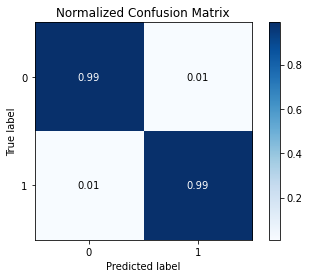

In [64]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

### Saving the best model

In [65]:
joblib.dump(best_model, "Fake_News_Detection_Project.pkl")

['Fake_News_Detection_Project.pkl']

### Loading the final model

In [66]:
Model = joblib.load("Fake_News_Detection_Project.pkl")

In [67]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
Fake_News_Detection_Project = pd.DataFrame()
Fake_News_Detection_Project['Predicted Fake News'] = prediction
Fake_News_Detection_Project['Actual Fake News'] = y
Fake_News_Detection_Project

,Predicted Fake News,Actual Fake News
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
11220,0,0
11221,1,0
11222,0,0
11223,0,0


### Saving into CSV Format

In [68]:
# Converting the dataframe into CSV format and saving it
Fake_News_Detection_Project.to_csv('Fake_News_Detection_Project.csv', index=False)

##### Note: Gradient Boosting Classifier, Random Forest Classifier and LGBM Classifier took more time while running the code compare to other model. Linear SVC took performed well while running and also accuracy score and cv score is good than other models.